In [61]:
import pandas as pd
df = pd.read_csv(r"F:\ALL Works\Ruet conference\DATA\nhts_merged.csv")
df.drop(["HOUSEID"], axis =1, inplace=True)
#df = df[df["TRIPPURP"].isin([4,2,1,3,5])]
df = df[df["TRPHHVEH"].isin([1,2])]
X = df.drop(["TRPHHVEH"], axis=1)
y = df["TRPHHVEH"]

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Accuracy score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc:.4f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Cross-validation scores (using 5-fold CV)
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f}")
print(f"Std CV Score: {cv_scores.std():.4f}")


Accuracy Score: 0.9776
Classification Report:
              precision    recall  f1-score   support

           1       0.98      1.00      0.99      1054
           2       0.96      0.79      0.87       107

    accuracy                           0.98      1161
   macro avg       0.97      0.90      0.93      1161
weighted avg       0.98      0.98      0.98      1161

Cross-validation Scores: [0.97932817 0.97844828 0.98448276 0.98362069 0.97672414]
Mean CV Score: 0.9805
Std CV Score: 0.0030


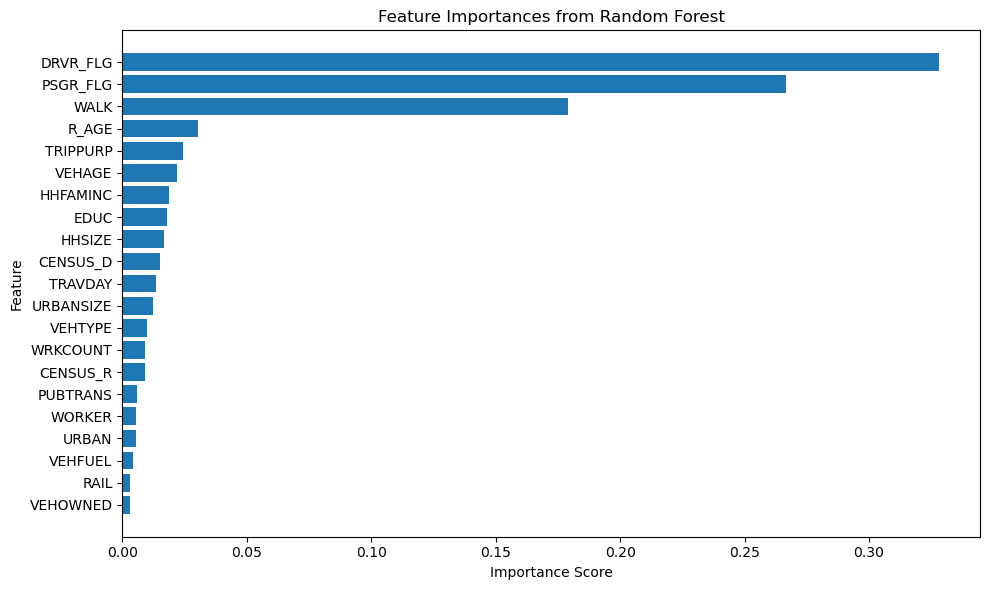

In [48]:
import matplotlib.pyplot as plt
importances = rf.feature_importances_

# If X is a DataFrame, get column names; otherwise, generate generic names
if isinstance(X, pd.DataFrame):
    feature_names = X.columns
else:
    feature_names = [f"Feature {i}" for i in range(X.shape[1])]

# Create a sorted dataframe
feat_imp_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_imp_df = feat_imp_df.sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df["Feature"], feat_imp_df["Importance"])
plt.gca().invert_yaxis()
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

**Shap explaining**

In [89]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import pandas as pd
df = pd.read_csv(r"F:\ALL Works\Ruet conference\DATA\nhts_merged.csv")
df.drop(["HOUSEID"], axis =1, inplace=True)
#df = df[df["TRIPPURP"].isin([4,2,1,3,5])]
df = df[df["TRPHHVEH"].isin([1,2])]
X = df.drop(["TRPHHVEH"], axis=1)
y = df["TRPHHVEH"]

# Example split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# Create SHAP TreeExplainer
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)


**shap bar plot**

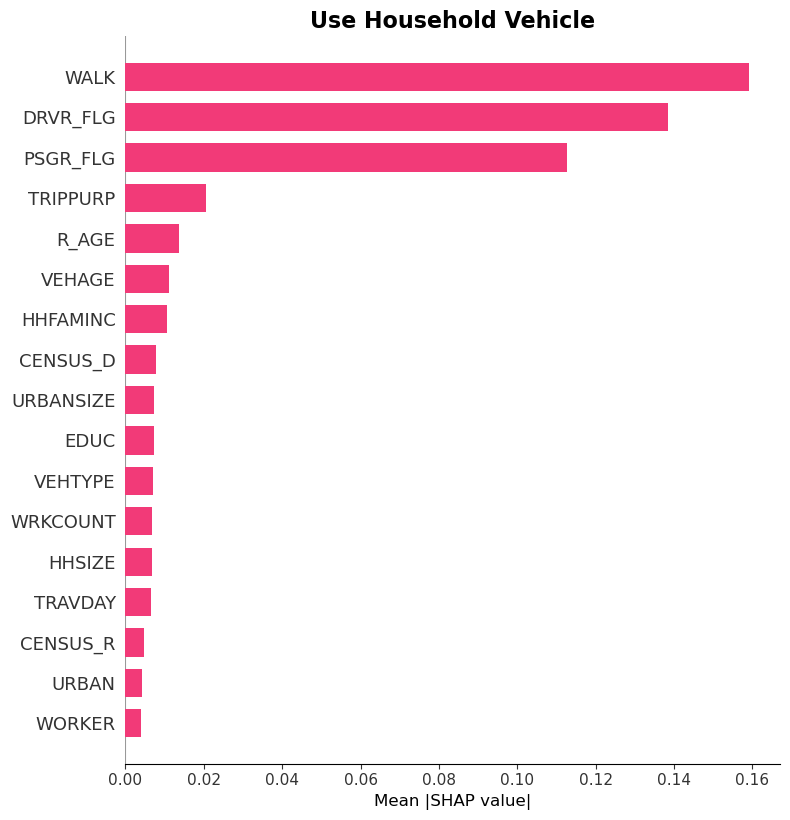

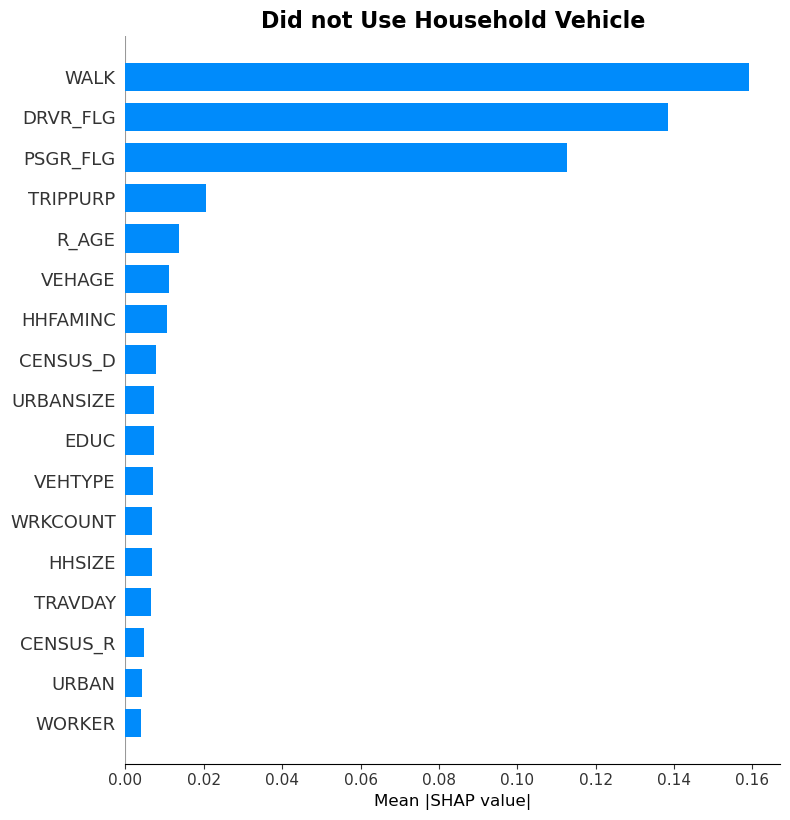

In [122]:
import matplotlib.pyplot as plt
import shap

# Extract SHAP values for both classes
shap_class0 = shap_values[:, :, 0]  # class 0 (use household)
shap_class1 = shap_values[:, :, 1]  # class 1 (don't use household)

# ---- Figure 1: Class 0 ----
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_class0, X_test, plot_type="bar", show=False, max_display=17, color="#f23a78")
plt.title("Use Household Vehicle", fontweight='bold', fontsize=16)
plt.xlabel("Mean |SHAP value|", fontsize=12)
plt.tight_layout()
plt.savefig("shap_bar_vehicle_use.png", dpi=1000)
plt.show()

# ---- Figure 2: Class 1 ----
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_class1, X_test, plot_type="bar", show=False, max_display=17)
plt.title("Did not Use Household Vehicle", fontweight='bold', fontsize=16)
plt.xlabel("Mean |SHAP value|", fontsize=12)
plt.tight_layout()
plt.savefig("shap_bar_vehicle_no_use.png", dpi=1000)
plt.show()


**violin plot**

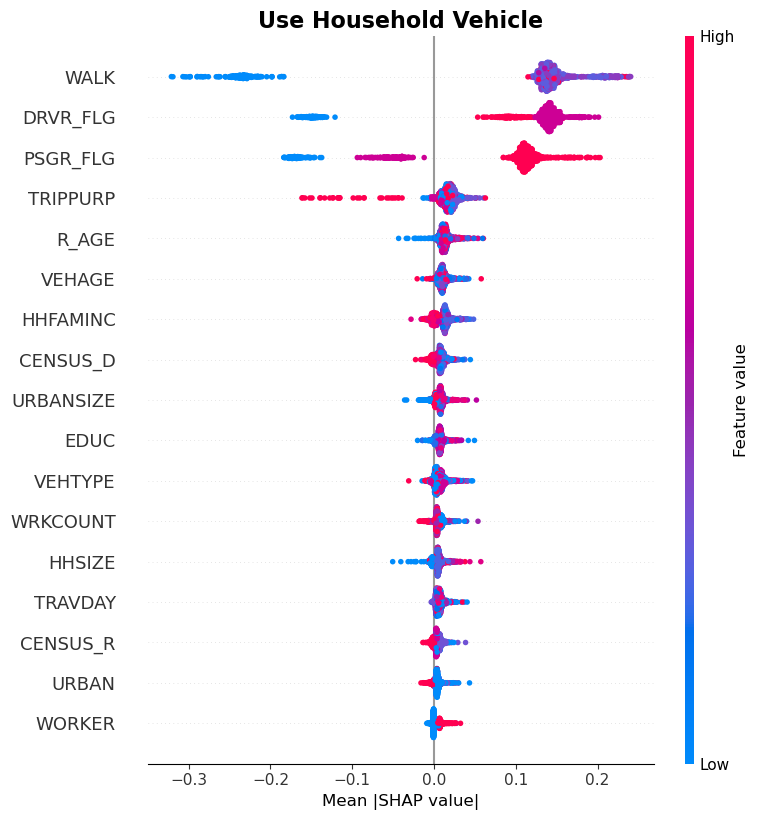

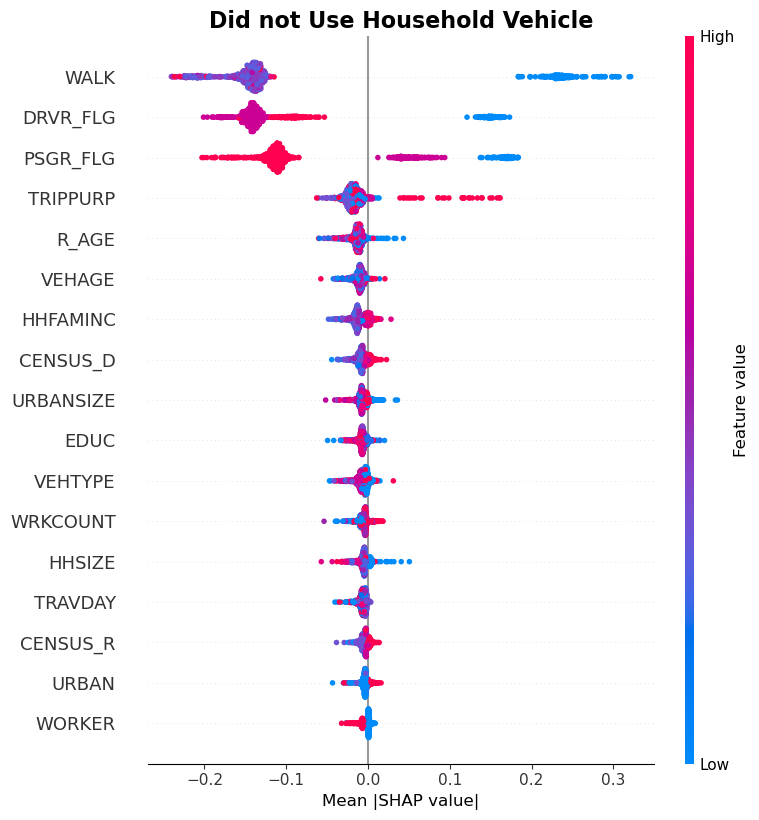

In [123]:
import matplotlib.pyplot as plt
import shap

# Extract SHAP values for both classes
shap_class0 = shap_values[:, :, 0]  # class 0 (use household)
shap_class1 = shap_values[:, :, 1]  # class 1 (don't use household)

# ---- Figure 1: Class 0 ----
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_class0, X_test, show=False, max_display=17)
plt.title("Use Household Vehicle", fontweight='bold', fontsize=16)
plt.xlabel("Mean |SHAP value|", fontsize=12)
plt.tight_layout()
plt.savefig("shap_violin_vehicle_use.png", dpi=1000)
plt.show()

# ---- Figure 2: Class 1 ----
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_class1, X_test, show=False, max_display=17)
plt.title("Did not Use Household Vehicle", fontweight='bold', fontsize=16)
plt.xlabel("Mean |SHAP value|", fontsize=12)
plt.tight_layout()
plt.savefig("shap_violin_vehicle_no_use.png", dpi=1000)
plt.show()


**dependency plot**

**household vehicle no use**

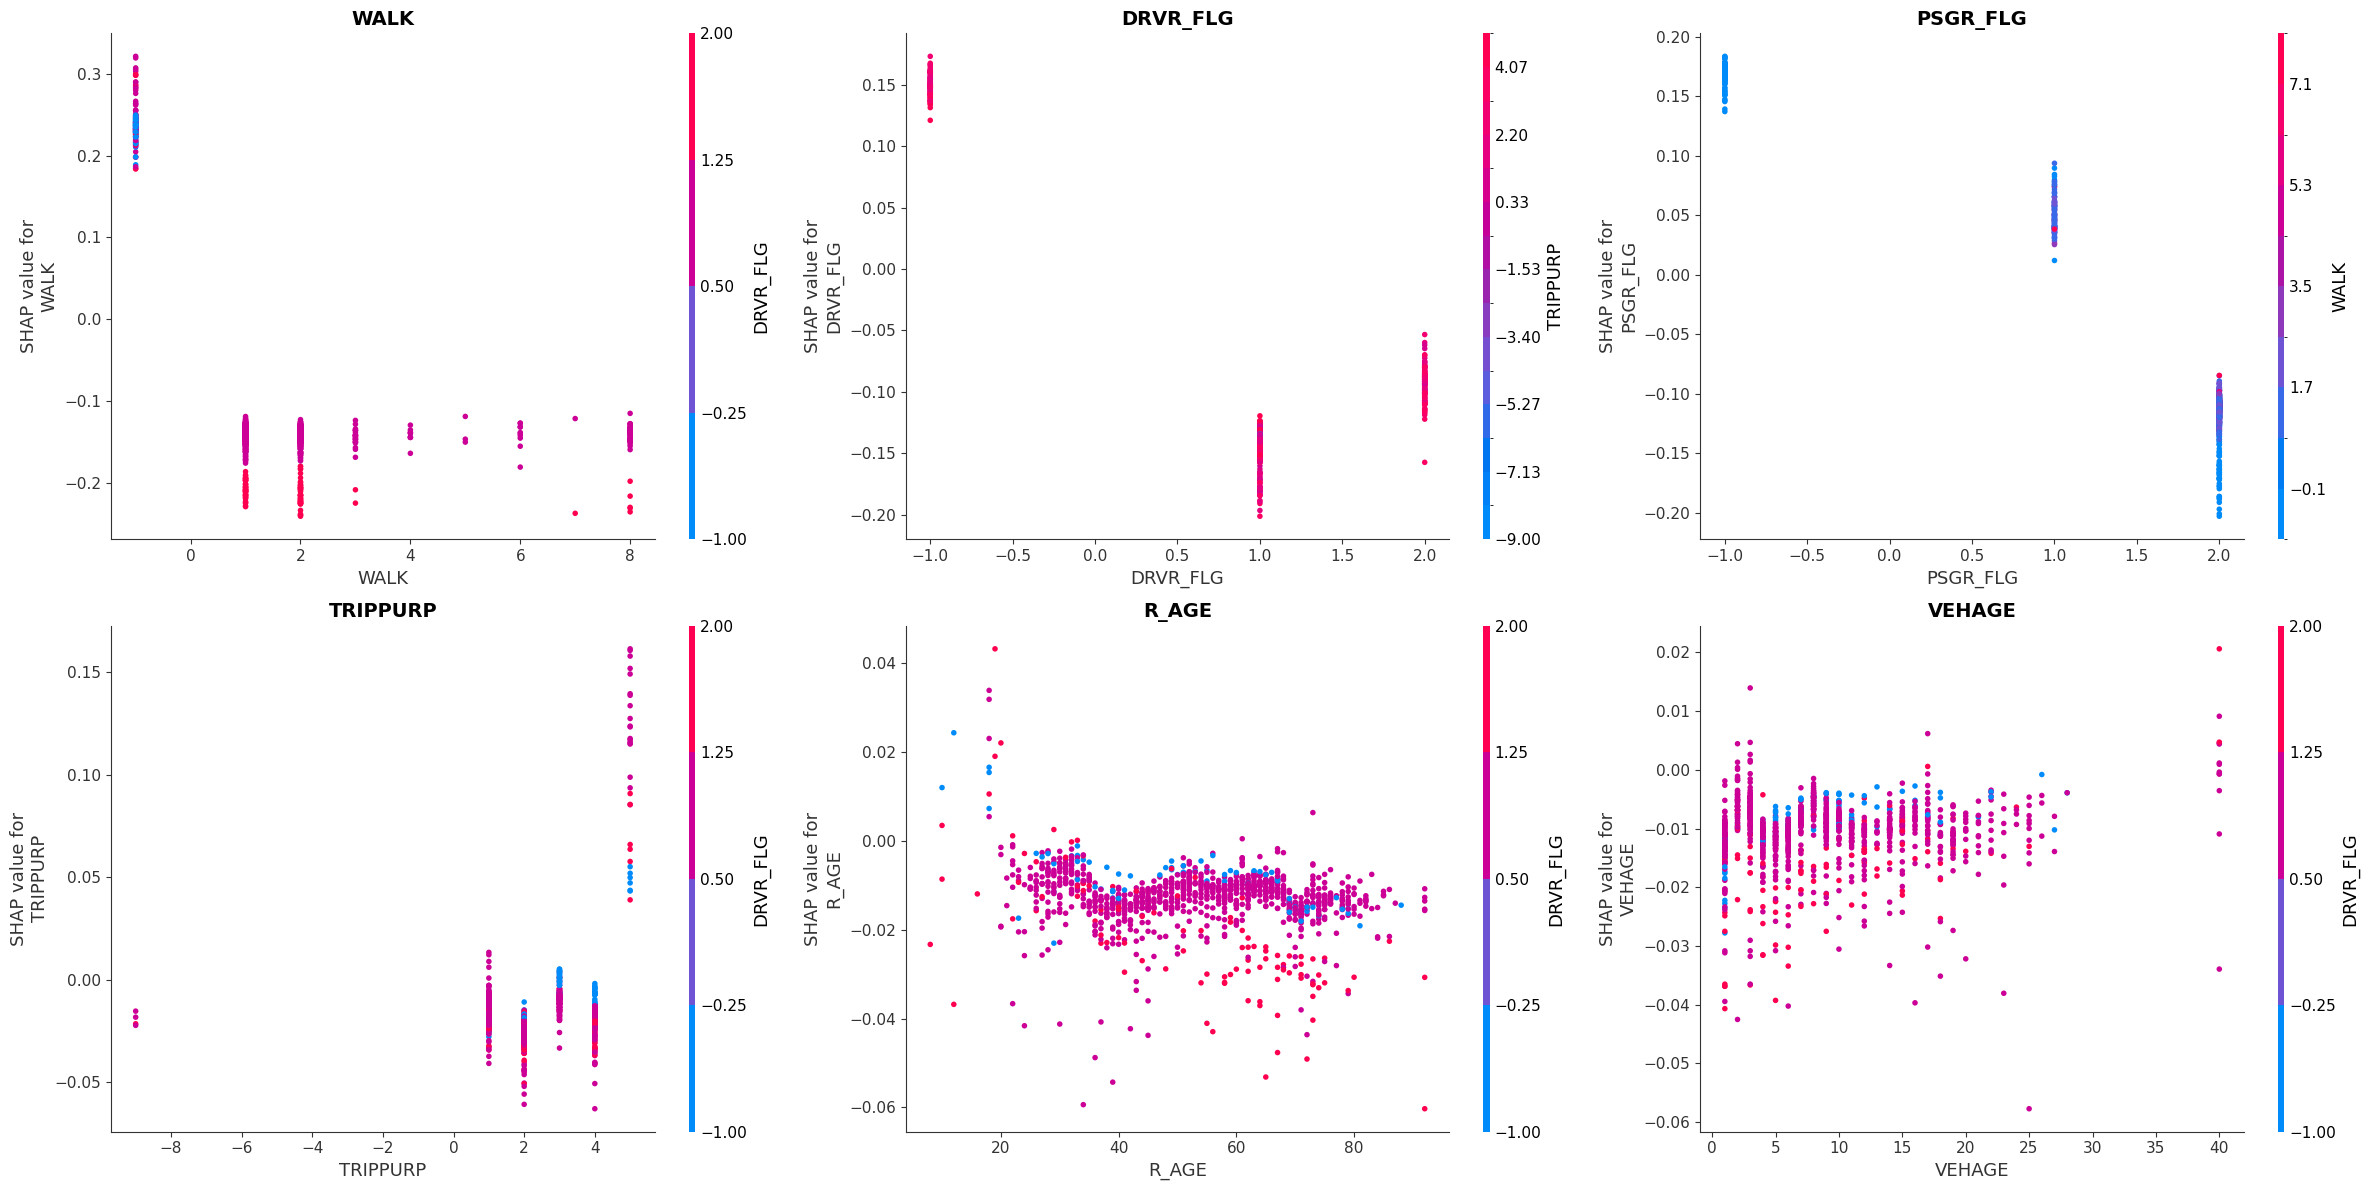

In [113]:
import numpy as np
shap_class1 = shap_values[:, :, 1]
# Get mean absolute SHAP values to identify top features
mean_shap = np.abs(shap_class1).mean(axis=0)

# Get indices of top 8 features
top_indices = np.argsort(mean_shap)[-6:][::-1]

# Get feature names
if hasattr(X_test, 'columns'):
    feature_names = X_test.columns
else:
    feature_names = [f"Feature {i}" for i in range(X_test.shape[1])]

# Create figure with 2 rows and 4 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 12))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot dependency plots
for i, index in enumerate(top_indices):
    plt.sca(axes[i])  # Set current axis
    shap.dependence_plot(
        index, shap_class1, X_test,
        ax=axes[i], show=False,
        feature_names=feature_names
        #interaction_index=None
    )
    axes[i].set_title(feature_names[index], fontweight='bold', fontsize=14)
    #axes[i].set_xlabel("")
    #axes[i].set_ylabel("")

# Hide any unused subplots (if fewer than 8 features)
for j in range(len(top_indices), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("shap_dependency_top6.png", dpi=1000)
plt.show()


**household vehicle use**

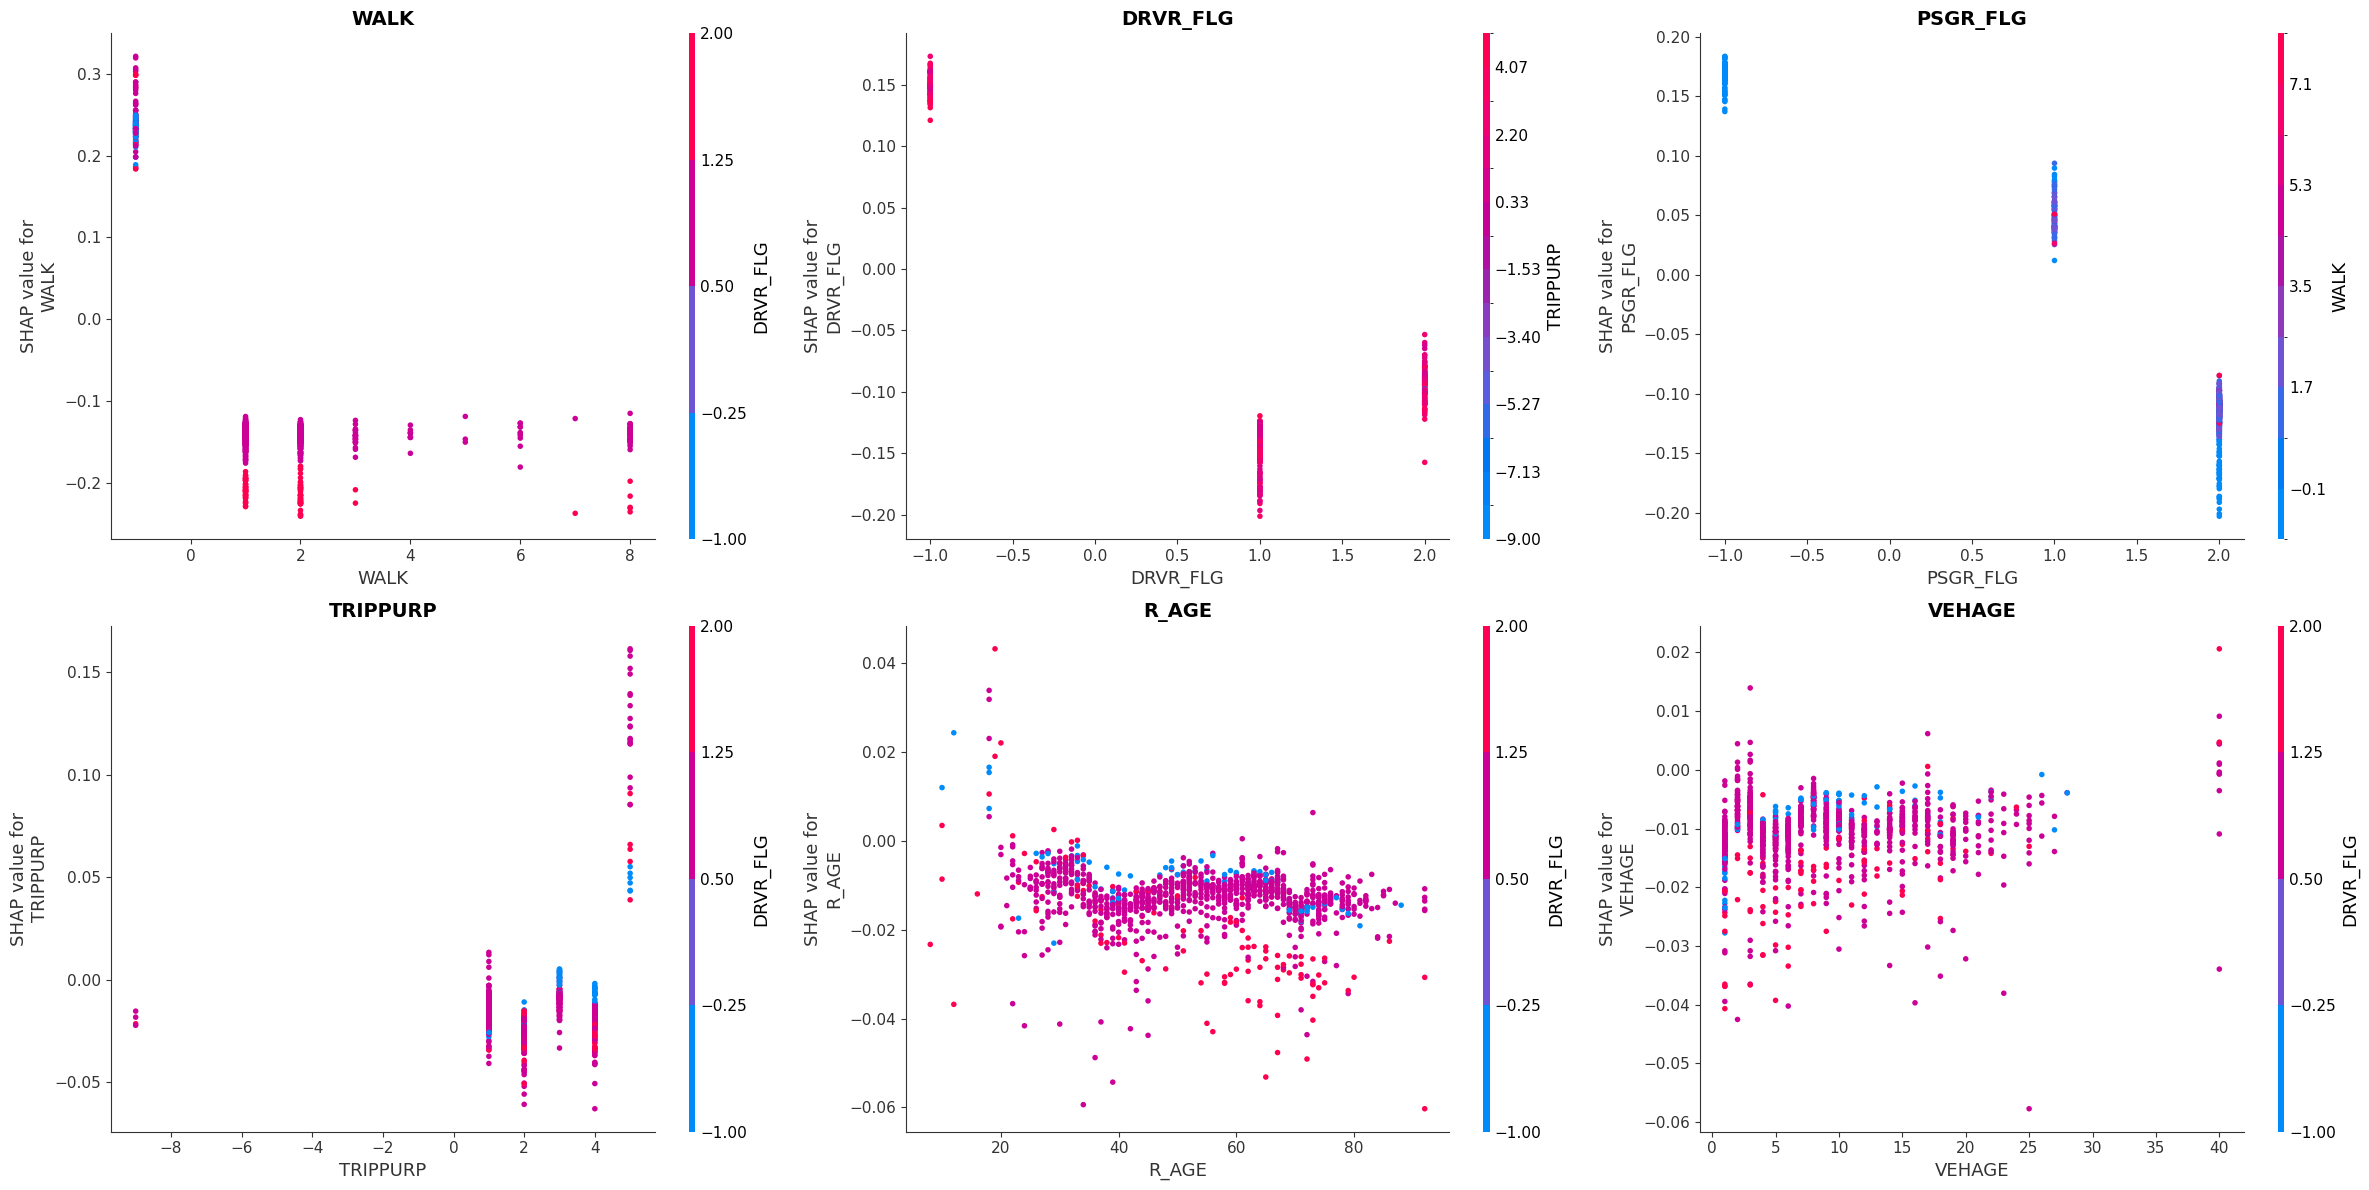

In [115]:
import numpy as np
shap_class0 = shap_values[:, :, 0]
# Get mean absolute SHAP values to identify top features
mean_shap = np.abs(shap_class0).mean(axis=0)

# Get indices of top 8 features
top_indices = np.argsort(mean_shap)[-6:][::-1]

# Get feature names
if hasattr(X_test, 'columns'):
    feature_names = X_test.columns
else:
    feature_names = [f"Feature {i}" for i in range(X_test.shape[1])]

# Create figure with 2 rows and 4 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 12))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot dependency plots
for i, index in enumerate(top_indices):
    plt.sca(axes[i])  # Set current axis
    shap.dependence_plot(
        index, shap_class1, X_test,
        ax=axes[i], show=False,
        feature_names=feature_names
        #interaction_index=None
    )
    axes[i].set_title(feature_names[index], fontweight='bold', fontsize=14)
    #axes[i].set_xlabel("")
    #axes[i].set_ylabel("")

# Hide any unused subplots (if fewer than 8 features)
for j in range(len(top_indices), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("shap_dependency_house_use_top6.png", dpi=1000)
plt.show()
